In [ ]:
'''
18 Columns:

Numerical Columns:

Administrative: The number of administrative pages the user visited during the session.
Administrative_Duration: The total time (in seconds) the user spent on administrative pages.
Informational: The number of informational pages the user visited during the session.
Informational_Duration: The total time (in seconds) the user spent on informational pages.
ProductRelated: The number of product-related pages the user visited during the session.
ProductRelated_Duration: The total time (in seconds) the user spent on product-related pages.
BounceRates: The average bounce rate of the pages the user visited.
ExitRates: The average exit rate of the pages the user visited. 
PageValues: The average value of the pages the user visited.
SpecialDay: The proximity of the session date to a specific special date (e.g., Mother's Day, Valentine's Day).

Categorical Columns:

Month: The month in which the session occurred.
OperatingSystems: The type of operating system the user used.
Browser: The type of browser the user used.
Region: The geographic region where the user's session began.
TrafficType: The type of traffic source that led the user to the website (e.g., banner ads, SMS, direct access, etc.).
VisitorType: The type of user, categorized as new visitor, returning visitor, or other.
Weekend: Whether the session occurred on a weekend.
Revenue: The target variable indicating whether the session ended with a purchase transaction (Boolean: True or False).

'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN


# Load dataset
df = pd.read_csv("online_shoppers_intention.csv")

df['Month'].unique()

cb_palette = sns.color_palette("Set1", 2)
# df.head(5)

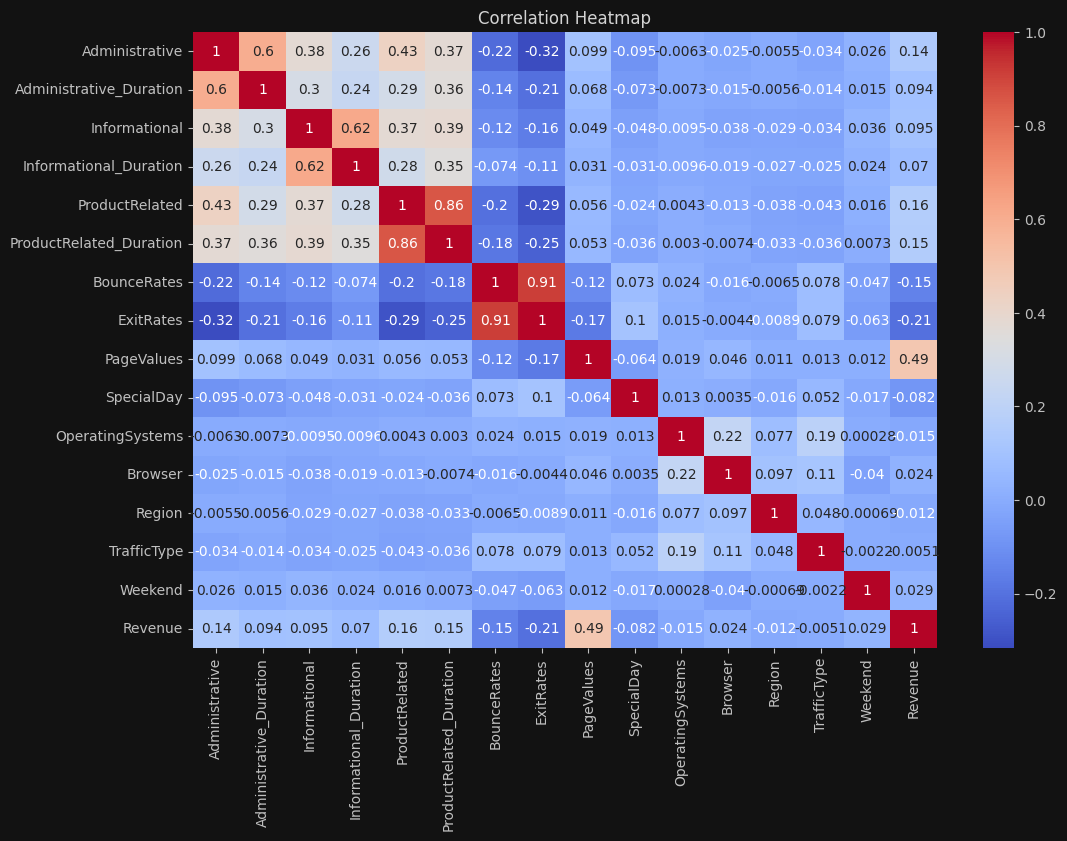

In [94]:
# Q1: Which features are highly correlated with each other or with the target variable (Revenue)?

df = pd.read_csv("online_shoppers_intention.csv")

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/4214661747.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


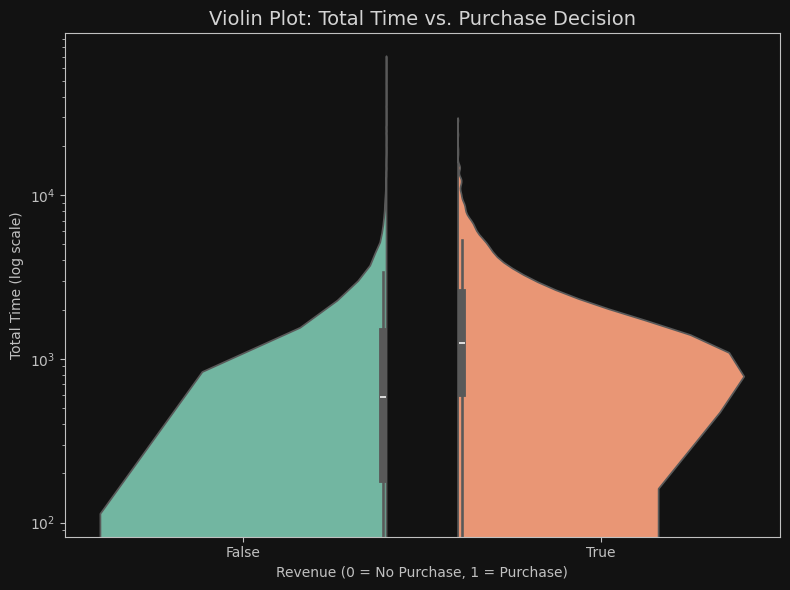

In [ ]:
#Q2: What is the relation for total time spent by users on different page types vs. Revenue?

df['TotalTime'] = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum(axis=1)

plt.figure(figsize=(8, 6))


sns.violinplot(
    x='Revenue', 
    y='TotalTime', 
    data=df, 
    scale='count', 
    palette='Set2', 
    split=True,
    hue = 'Revenue',
    legend = False
)

plt.yscale('log')  # 对数尺度
plt.title("Violin Plot: Total Time vs. Purchase Decision", fontsize=14)
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Total Time (log scale)")
plt.tight_layout()
plt.show()

In [126]:
df['BounceRates'].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

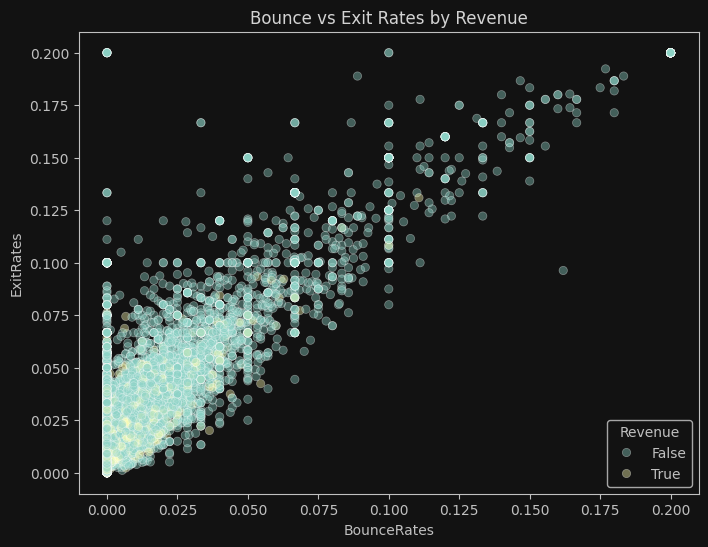

In [125]:
# Q2: How do Bounce Rates and Exit Rates relate to the likelihood of making a purchase?
plt.figure(figsize=(8, 6))
df['BounceTendency'] = df.apply(lambda row: row['BounceRates'] * 0.6 + row['ExitRates'] * 0.4, axis=1)
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df, alpha=0.4)
plt.title("Bounce vs Exit Rates by Revenue")
plt.show()

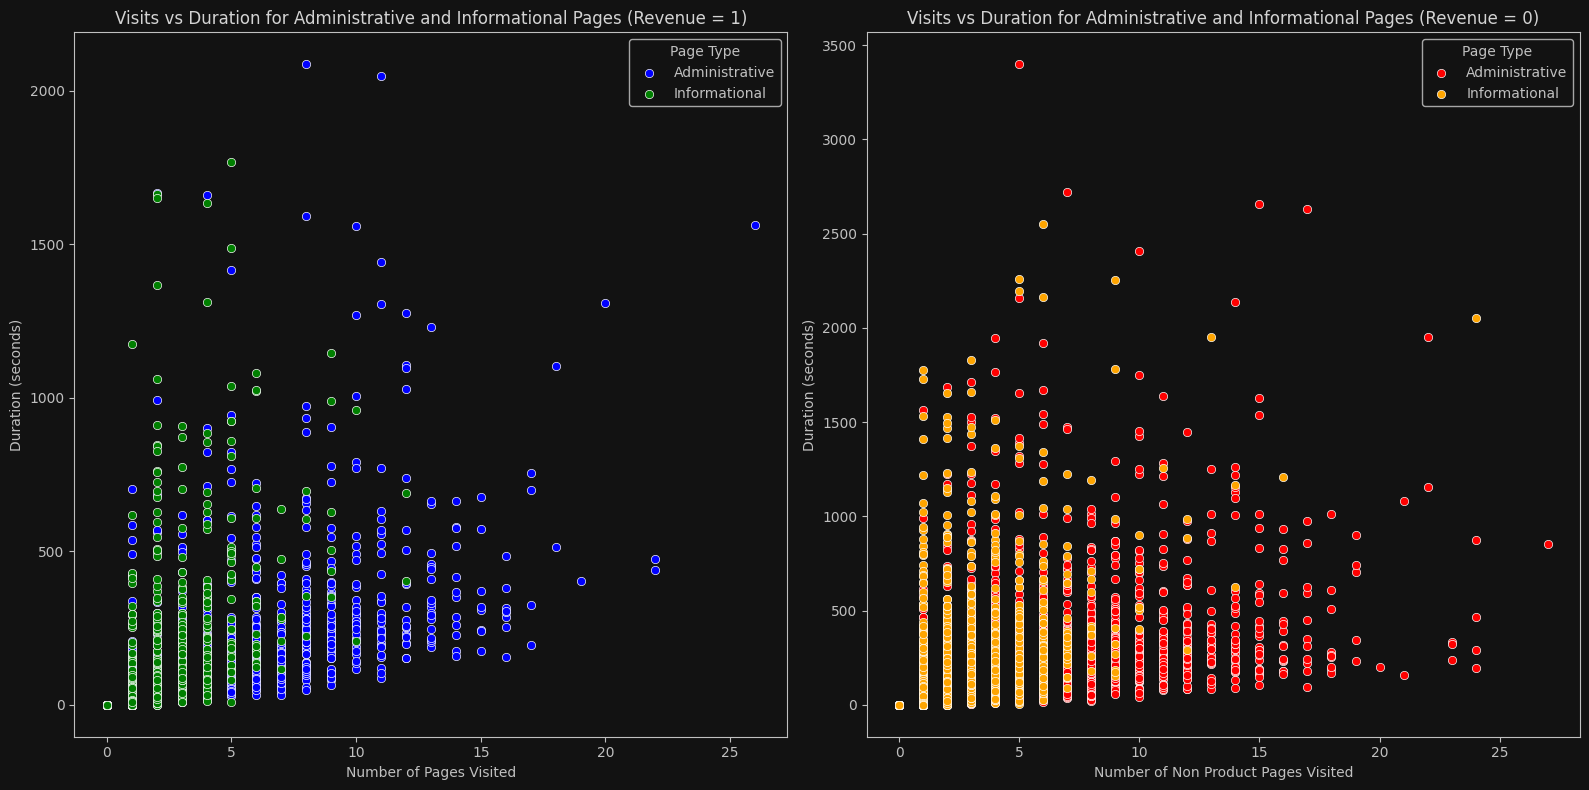

In [127]:
#Q3: WHat's users' behavior on Administrative vs Informational Pages by Revenue?
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Revenue=True
sns.scatterplot(x='Administrative', y='Administrative_Duration', data=df[df['Revenue'] == True], color='blue', ax=ax[0], label='Administrative')
sns.scatterplot(x='Informational', y='Informational_Duration', data=df[df['Revenue'] == True], color='green', ax=ax[0], label='Informational')
ax[0].set_title('Visits vs Duration for Administrative and Informational Pages (Revenue = 1)')
ax[0].set_xlabel('Number of Pages Visited')
ax[0].set_ylabel('Duration (seconds)')
ax[0].legend(title='Page Type')

# Revenue=False
sns.scatterplot(x='Administrative', y='Administrative_Duration', data=df[df['Revenue'] == False], color='red', ax=ax[1], label='Administrative')
sns.scatterplot(x='Informational', y='Informational_Duration', data=df[df['Revenue'] == False], color='orange', ax=ax[1], label='Informational')
ax[1].set_title('Visits vs Duration for Administrative and Informational Pages (Revenue = 0)')
ax[1].set_xlabel('Number of Non Product Pages Visited')
ax[1].set_ylabel('Duration (seconds)')
ax[1].legend(title='Page Type')


plt.tight_layout()
plt.show()

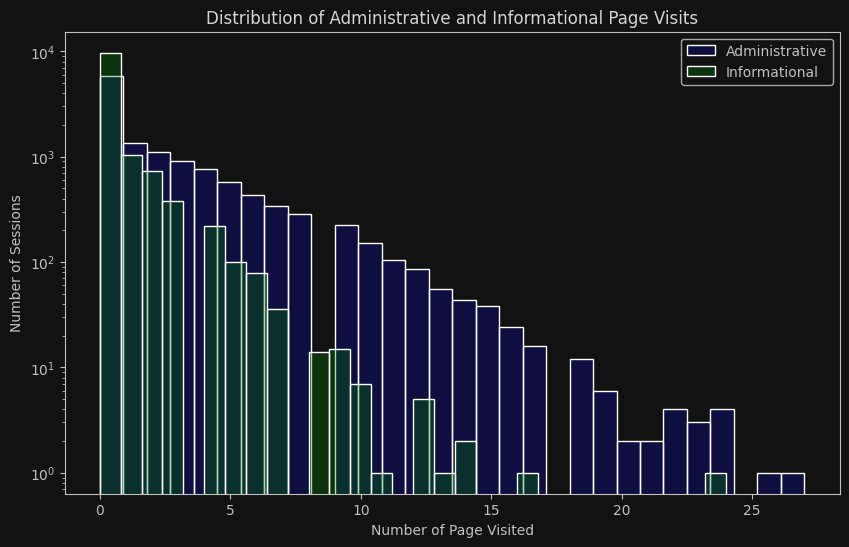

In [132]:
#Q4: what's the distribution of Administrative and Informational Page Visits?
plt.figure(figsize=(10, 6))
sns.histplot(df['Administrative'], bins=30, color='blue', label='Administrative', kde=False, alpha=0.2)
sns.histplot(df['Informational'], bins=30, color='green', label='Informational', kde=False, alpha=0.3)
plt.title('Distribution of Administrative and Informational Page Visits')
plt.xlabel('Number of Page Visited')
plt.ylabel('Number of Sessions')
plt.yscale('log') 
plt.legend()
plt.show()

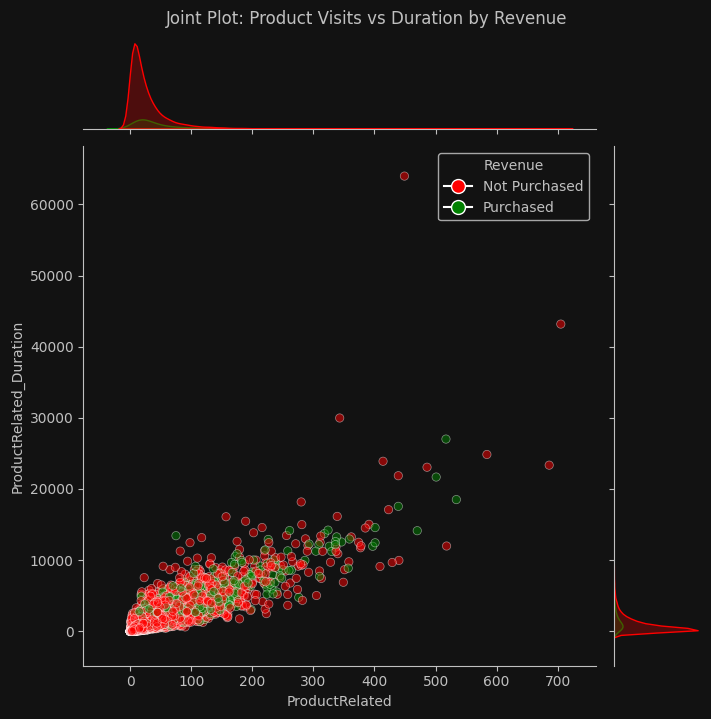

In [ ]:
#Q5: How do ProductRelated Page Visited and Duration relate to Purchase Decisions (Revenue)?"

g=sns.jointplot(
    x='ProductRelated', 
    y='ProductRelated_Duration', 
    hue='Revenue', 
    data=df, 
    kind='scatter', 
    height=7, 
    alpha=0.5,
    palette={0: 'red', 1: 'green'} 
)

ax = g.ax_joint
ax.legend_.remove()

# customize legend
custom_legend_labels = ['Not Purchased', 'Purchased']
custom_colors = ['red', 'green']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in custom_colors]
ax.legend(handles, custom_legend_labels, title='Revenue', loc='upper right')

plt.suptitle("Joint Plot: Product Visits vs Duration by Revenue", y=1.02)
plt.show()

In [27]:
df['Month'].unique()
# june_data = df[df['Month'] == 'Feb']
# june_data['Revenue'].value_counts()


array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/2512198876.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month_Categorized', data=df, palette='Set2', ax=axes[0])
/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/2512198876.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Revenue', data=df, width=0.5, palette='colorblind', ax=axes[1])


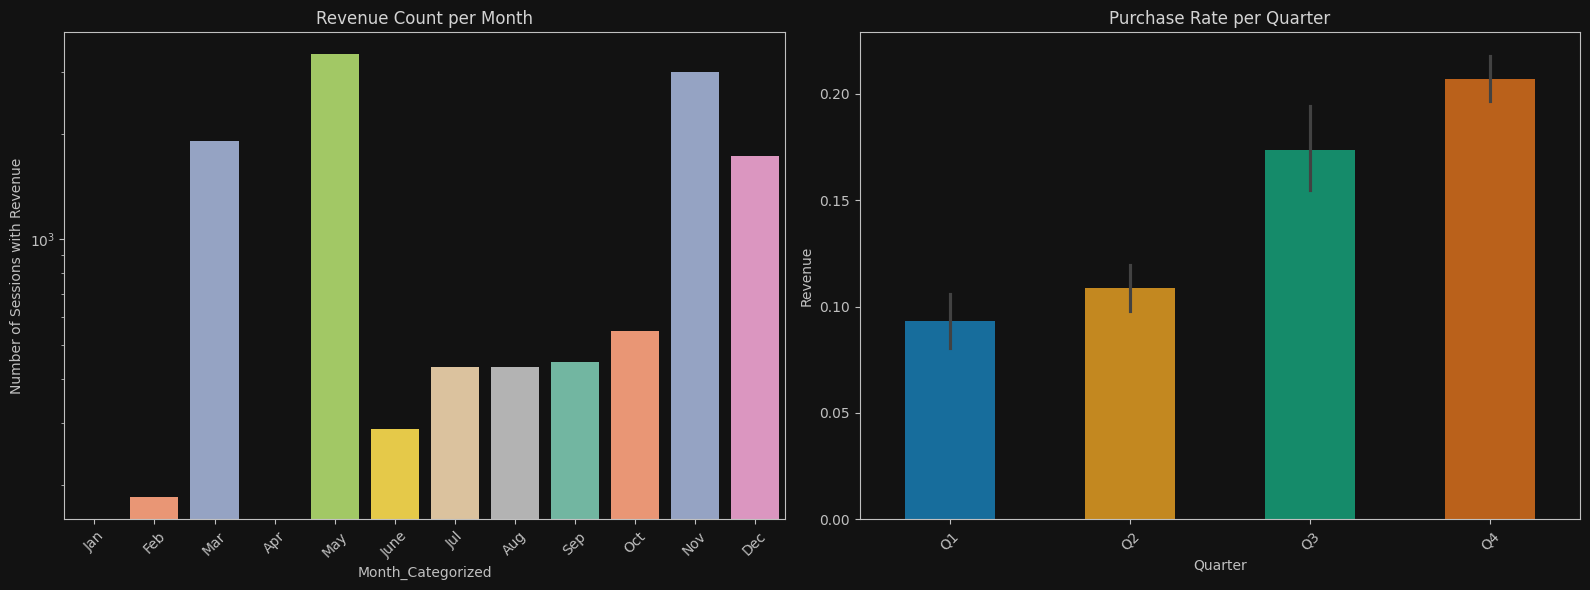

In [ ]:
# Q6: What does Quarter-wise Revenue behavior look like?
month_to_quarter = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)

quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
df['Quarter'] = pd.Categorical(df['Quarter'], categories=quarter_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_Categorized'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Month
sns.countplot(x='Month_Categorized', data=df, palette='Set2', ax=axes[0])
axes[0].set_title("Revenue Count per Month")
axes[0].set_ylabel("Number of Sessions with Revenue")
axes[0].set_yscale('log') 
axes[0].tick_params(axis='x', rotation=45)

# subplot 2: Quarter
sns.barplot(x='Quarter', y='Revenue', data=df, width=0.5, palette='colorblind', ax=axes[1])
axes[1].set_title("Purchase Rate per Quarter")
axes[1].tick_params(axis='x', rotation=45) 


plt.tight_layout()

plt.show()

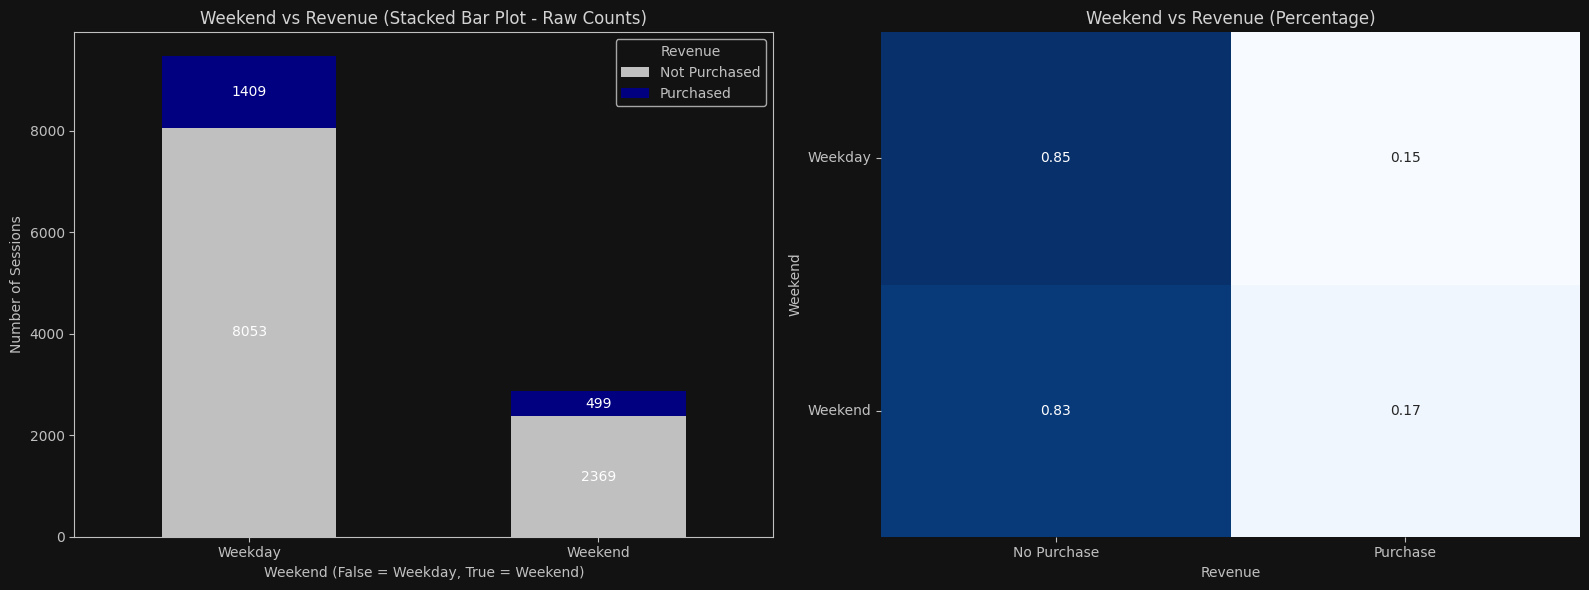

In [ ]:
# Q7: How does sessions vary for weekend vs. weekday and its likelyhood of purchase?

heatmap_data_raw = pd.crosstab(df['Weekend'], df['Revenue'])
heatmap_data_percentage = heatmap_data_raw.div(heatmap_data_raw.sum(axis=1), axis=0)  # normalize

# subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# sub1
heatmap_data_raw.plot(kind='bar', stacked=True, color=['silver', 'navy'], ax=axes[0])
axes[0].set_title("Weekend vs Revenue (Stacked Bar Plot - Raw Counts)")
axes[0].set_xlabel("Weekend (False = Weekday, True = Weekend)")
axes[0].set_ylabel("Number of Sessions")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
axes[0].legend(title="Revenue", labels=["Not Purchased", "Purchased"])

# adding number
for bars in axes[0].patches:
    height = bars.get_height()
    if height > 0:  
        axes[0].text(
            bars.get_x() + bars.get_width() / 2,  # x axis
            bars.get_y() + height / 2,  # y axis
            f'{int(height)}',  # text display
            ha='center', va='center', fontsize=10, color='white'
        )

# sub2: heatmap
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Weekend vs Revenue (Percentage)")
axes[1].set_xlabel("Revenue")
axes[1].set_xticks([0.5, 1.5])
axes[1].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)
axes[1].set_yticks([0.5, 1.5])
axes[1].set_yticklabels(['Weekday', 'Weekend'], rotation=0)


plt.tight_layout()
plt.show()

In [ ]:
heatmap_data_raw

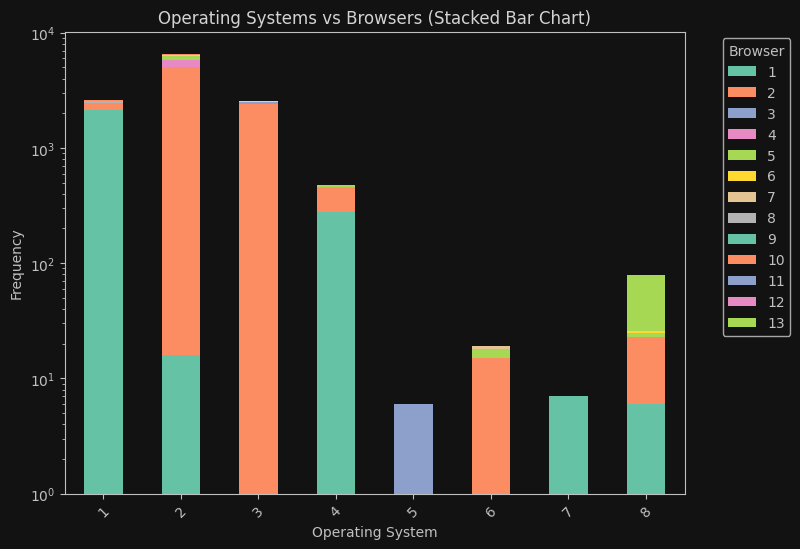

In [ ]:
# Q8: What kind of Browsers are most likely to lead to a purchase?
cross_tab = pd.crosstab(df['OperatingSystems'], df['Browser'])

# barplot
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette("Set2", len(cross_tab.columns)))


plt.title("Operating Systems vs Browsers (Stacked Bar Chart)")
plt.xlabel("Operating System")
plt.ylabel("Frequency")
plt.yscale('log') 
plt.xticks(rotation=45)
plt.legend(title="Browser", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [167]:
df[df['Browser']==9]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,TotalTime,BounceTendency,Month_Categorized,Cluster,Quarter
284,2,390.0,0,0.0,10,1169.1,0.02,0.05,0.0,0.0,...,9,2,Returning_Visitor,False,False,1559.1,0.032,Mar,0,Q1


/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/1180862154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Browser', y='BounceRates', data=df, palette='Set2')


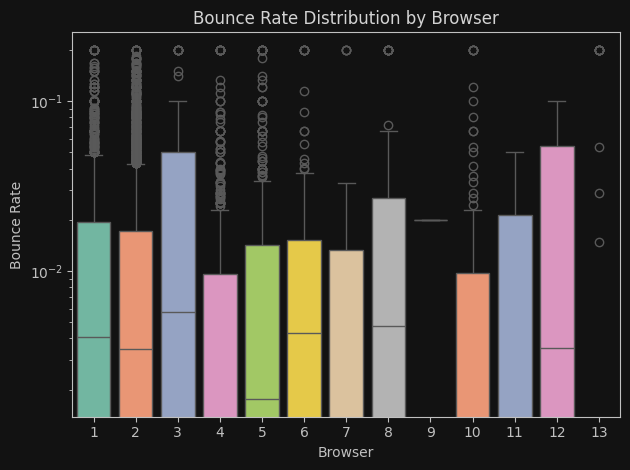

In [154]:
#Q9: Browers vs Bounce Rate
sns.boxplot(x='Browser', y='BounceRates', data=df, palette='Set2')

# 添加标题和标签
plt.title('Bounce Rate Distribution by Browser')
plt.xlabel('Browser')
plt.ylabel('Bounce Rate')
plt.yscale('log')

# for i, browser in enumerate(df['Browser'].unique()):
#     median = df[df['Browser'] == browser]['BounceRates'].median()
#     plt.text(i, median + 0.01, f'Median: {median:.2f}', horizontalalignment='center')

# 显示图表
plt.tight_layout()
plt.show()

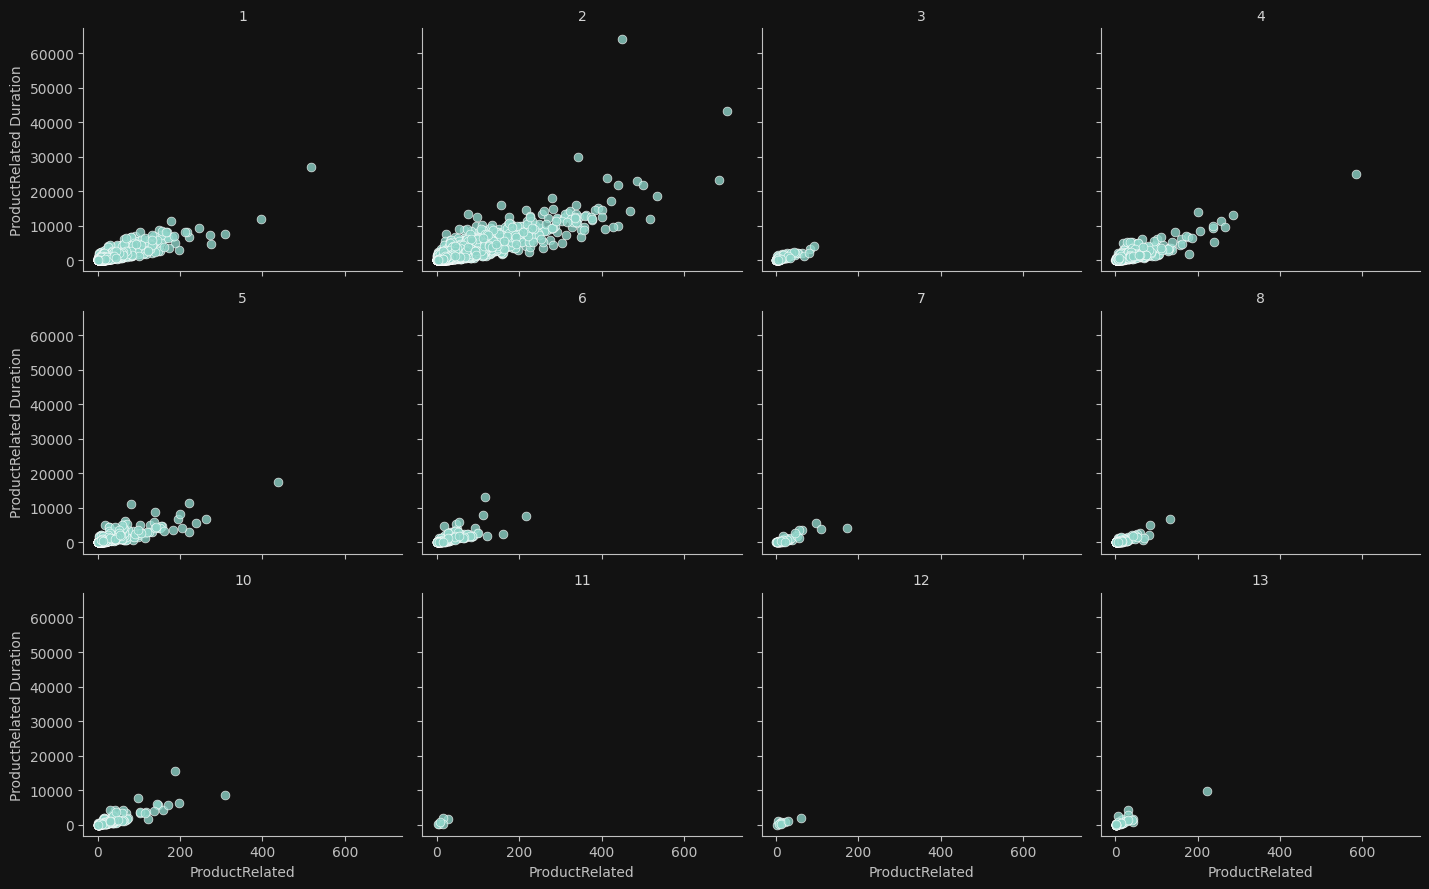

In [172]:
#Q10: What are the differences in ProductRelated visits and ProductRelated_Duration among various browsers?

# Create a FacetGrid with different subplots for each browser
browser_counts = df['Browser'].value_counts()

# Set a threshold 
threshold = 5 

# Filter out browsers with fewer than the threshold number of samples
filtered_df = df[df['Browser'].isin(browser_counts[browser_counts >= threshold].index)]

# Create the FacetGrid
g = sns.FacetGrid(filtered_df, col='Browser', col_wrap=4, height=3, aspect=1.2)
g.map(sns.scatterplot, 
      'ProductRelated', 
      'ProductRelated_Duration', 
      alpha=0.8,
      s = 40,
      edgecolor='w',
      linewidth=0.5)


g.set_axis_labels('ProductRelated', 'ProductRelated Duration')
g.set_titles(col_template="{col_name}")


plt.tight_layout()
plt.show()

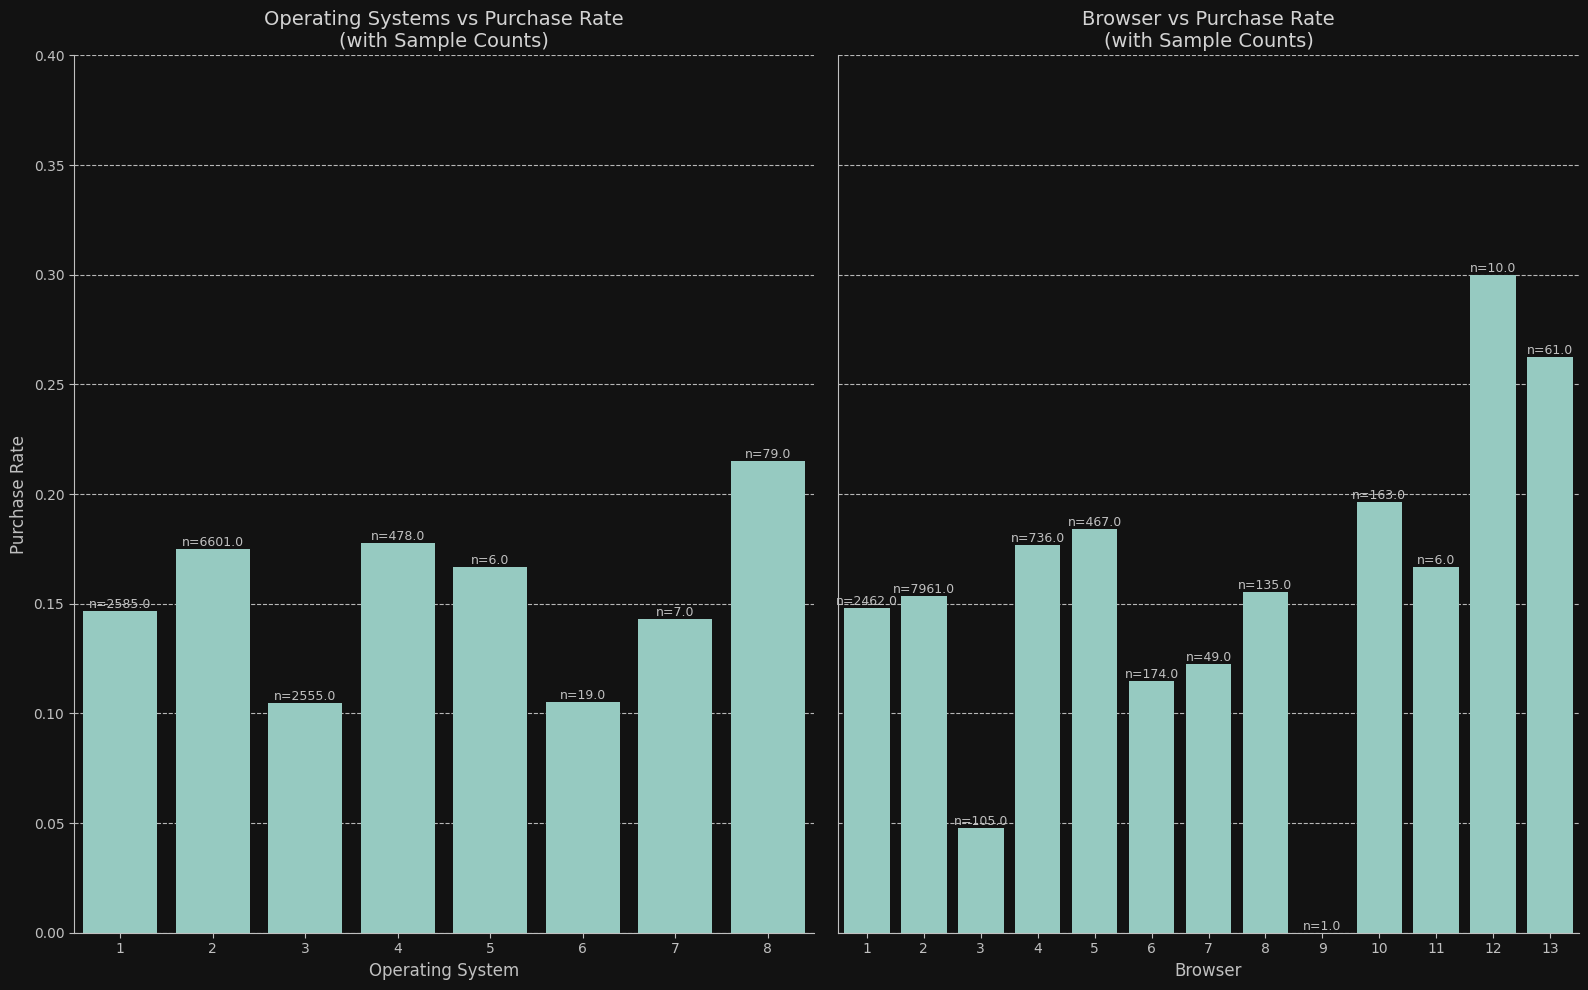

In [220]:
#Q11: Which Operating Systems or Browsers are most likely to lead to a purchase?

temp_os = df.groupby('OperatingSystems')['Revenue'].agg(['mean', 'count']).reset_index()
temp_browser = df.groupby('Browser')['Revenue'].agg(['mean', 'count']).reset_index()

# build two bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
y_max = max(temp_os['mean'].max()+0.1, temp_browser['mean'].max()+0.1)

# barplot1
sns.barplot(x='OperatingSystems', y='mean', data=temp_os, ax=axes[0])
for index, row in temp_os.iterrows():
    axes[0].text(index, row['mean'], f"n={row['count']}", ha='center', va='bottom', fontsize=9)
axes[0].set_title("Operating Systems vs Purchase Rate\n(with Sample Counts)", fontsize=14)
axes[0].set_xlabel("Operating System", fontsize=12)
axes[0].set_ylabel("Purchase Rate", fontsize=12)
axes[0].set_ylim(0, y_max)


axes[0].tick_params(axis='y', which='both', left=True, labelleft=True)

axes[0].yaxis.grid(True, linestyle='--', alpha=0.7)
axes[0].set_axisbelow(True)

# --- 右侧图：Browser ---
sns.barplot(x='Browser', y='mean', data=temp_browser, ax=axes[1])
for index, row in temp_browser.iterrows():
    axes[1].text(index, row['mean'], f"n={row['count']}", ha='center', va='bottom', fontsize=9)
axes[1].set_title("Browser vs Purchase Rate\n(with Sample Counts)", fontsize=14)
axes[1].set_xlabel("Browser", fontsize=12)
axes[1].set_ylabel("")  
axes[1].set_ylim(0, y_max)
# 隐藏右图的 y 轴刻度和标签
axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)
# 同样添加 y 轴网格
axes[1].yaxis.grid(True, linestyle='--', alpha=0.7)
axes[1].set_axisbelow(True)

# 去除两个子图的上边框和右边框
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



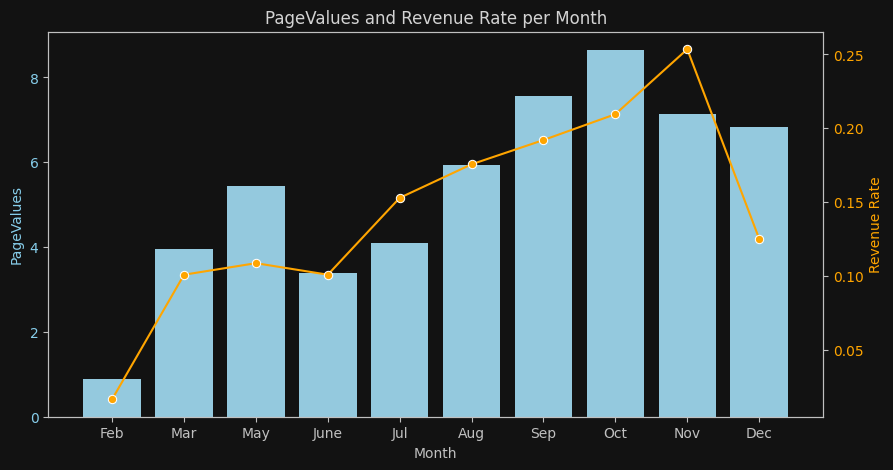

In [210]:
#Q12: How do PageValues and Revenue Rate vary across different months?


monthly_mean_data = df.groupby('Month').agg({'PageValues': 'mean', 'Revenue': 'mean'}).reset_index()

month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_mean_data['Month'] = pd.Categorical(monthly_mean_data['Month'], categories=month_order, ordered=True)

fig, ax1 = plt.subplots(figsize=(10, 5))

#left y-axis for PageValues
sns.barplot(x='Month', y='PageValues', data=monthly_mean_data, color='skyblue', ax=ax1)
ax1.set_ylabel('PageValues', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# right y-axis for Revenue Rate
ax2 = ax1.twinx()
sns.lineplot(x='Month', y='Revenue', data=monthly_mean_data, color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Revenue Rate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("PageValues and Revenue Rate per Month")
plt.show()

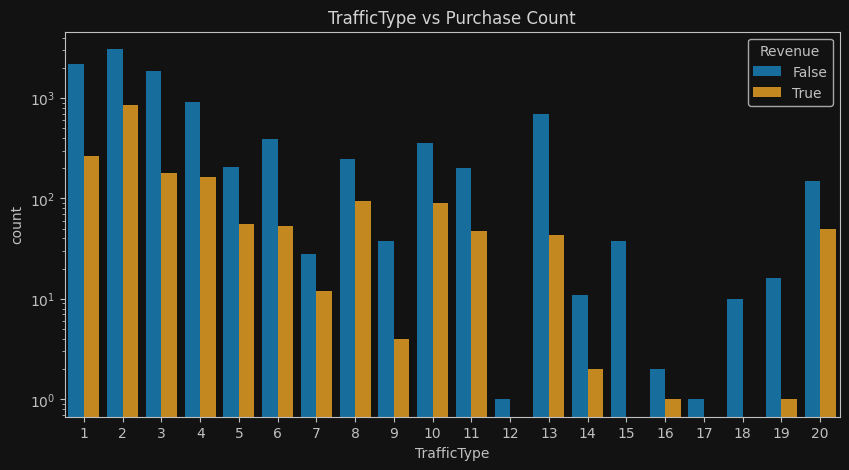

In [246]:
#Q13. How do different TrafficTypes affect the purchase behavior of users?

plt.figure(figsize=(10, 5))
sns.countplot(x='TrafficType', hue='Revenue', data=df, palette='colorblind')
plt.title("TrafficType vs Purchase Count")
plt.yscale('log')
plt.show()

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/4205609736.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(["Not Weekend", "Weekend"])


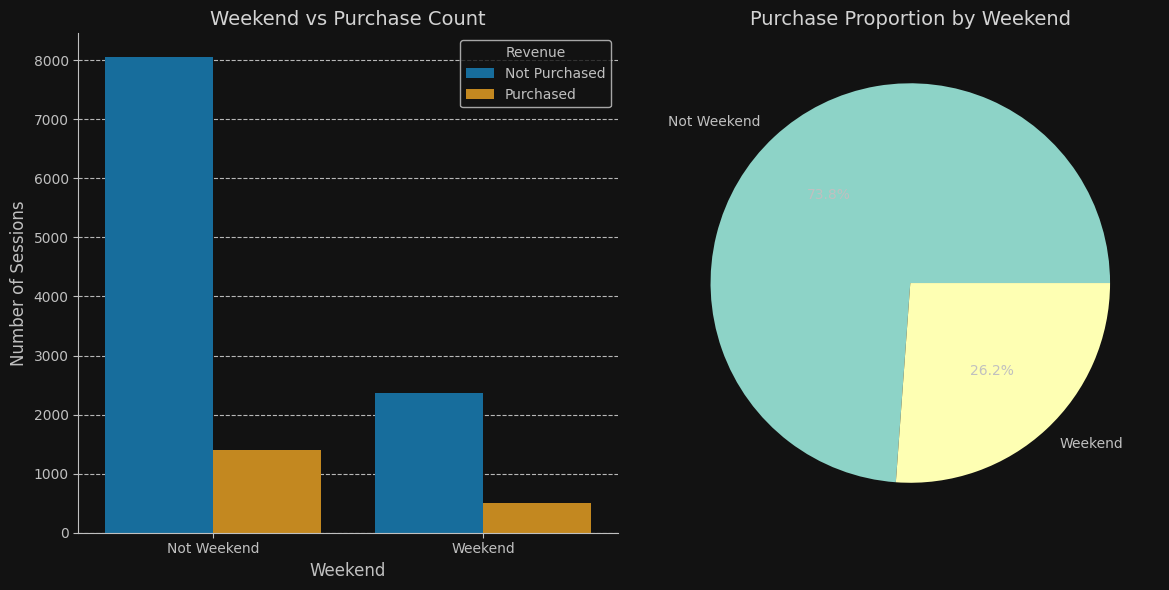

In [247]:
#Q14: What proportion of purchase sessions occur on weekends versus weekdays?
plt.figure(figsize=(12, 6))

common_colors = sns.color_palette("colorblind", 2)

# subplot 1: countplot
ax1 = plt.subplot(1, 2, 1)

sns.countplot(x='Weekend', hue='Revenue', data=df, 
              palette=common_colors, ax=ax1)
ax1.set_title("Weekend vs Purchase Count", fontsize=14)
ax1.set_xlabel("Weekend", fontsize=12)
ax1.set_ylabel("Number of Sessions", fontsize=12)

ax1.set_xticklabels(["Not Weekend", "Weekend"])

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)


ax1.legend(title="Revenue", labels=["Not Purchased", "Purchased"], loc='best')

# subplot 2: pie chart
ax2 = plt.subplot(1, 2, 2)

weekend_purchased = df[df['Revenue'] == 1]['Weekend'].value_counts().sort_index()

weekend_purchased.plot(kind='pie', autopct='%1.1f%%', 
                        labels=["Not Weekend", "Weekend"], ax=ax2)
ax2.set_title("Purchase Proportion by Weekend", fontsize=14)
ax2.set_ylabel("")


plt.tight_layout()
plt.show()

In [46]:
df['ExitRates'].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

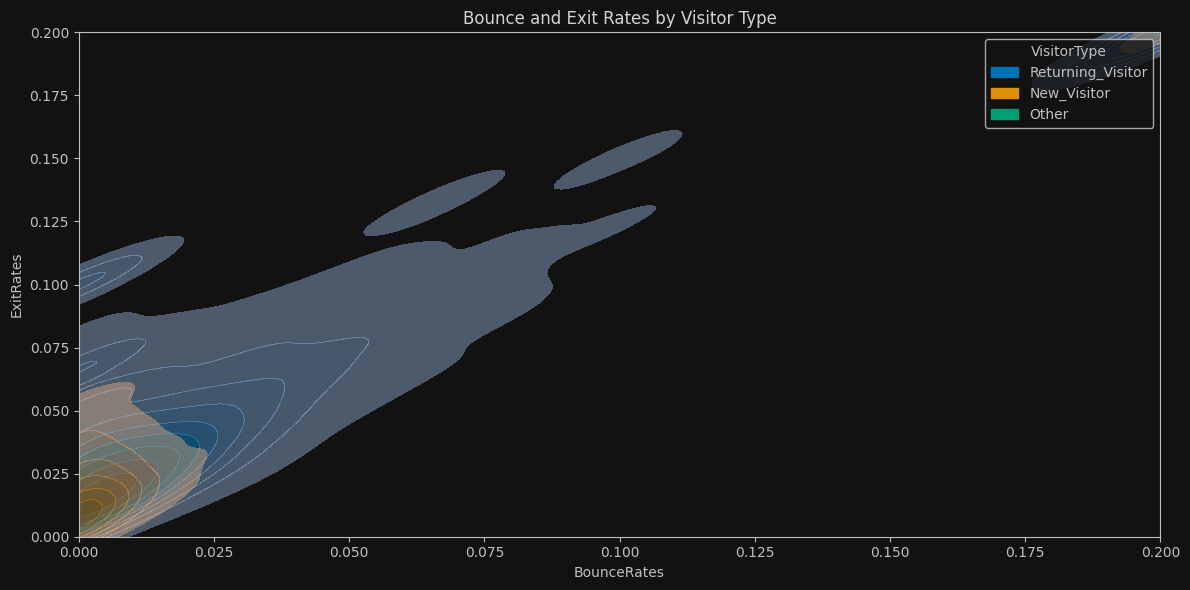

In [ ]:
#Q15: How do Bounce and Exit Rates differ by Visitor Type?

fig, ax = plt.subplots(figsize=(12, 6))

# 绘制 KDE 图
sns.kdeplot(
    x='BounceRates', 
    y='ExitRates', 
    hue='VisitorType', 
    data=df, 
    fill=True, 
    alpha=0.4, 
    bw_adjust=0.8, 
    palette='colorblind',
    ax=ax
)


ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2)
ax.set_title("Bounce and Exit Rates by Visitor Type")


handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:], title="Visitor Type", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

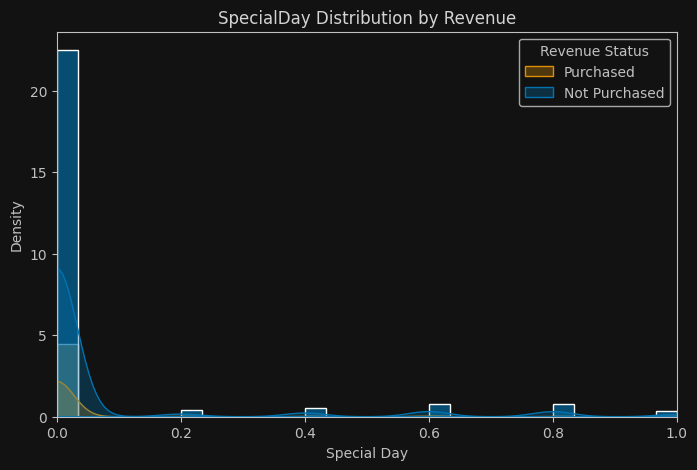

In [ ]:
#Q16: What's SpecialDay density distribution by Revenue?
plt.figure(figsize=(8, 5))


sns.histplot(
    data=df, 
    x='SpecialDay', 
    hue='Revenue', 
    bins=30, 
    stat='density',
    alpha=0.6,
    palette='colorblind'
)


sns.kdeplot(
    data=df, 
    x='SpecialDay', 
    hue='Revenue', 
    fill=True, 
    alpha=0.3, 
    palette='colorblind'
)

plt.title("SpecialDay Distribution by Revenue")
plt.legend(title="Revenue Status", labels=['Purchased', 'Not Purchased'])
plt.xlabel("Special Day")
plt.ylabel("Density")
plt.xlim(0, 1)  
plt.show()

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/804876335.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='mean', data=region_summary, ci=None, palette='Set2')
/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/804876335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='mean', data=region_summary, ci=None, palette='Set2')


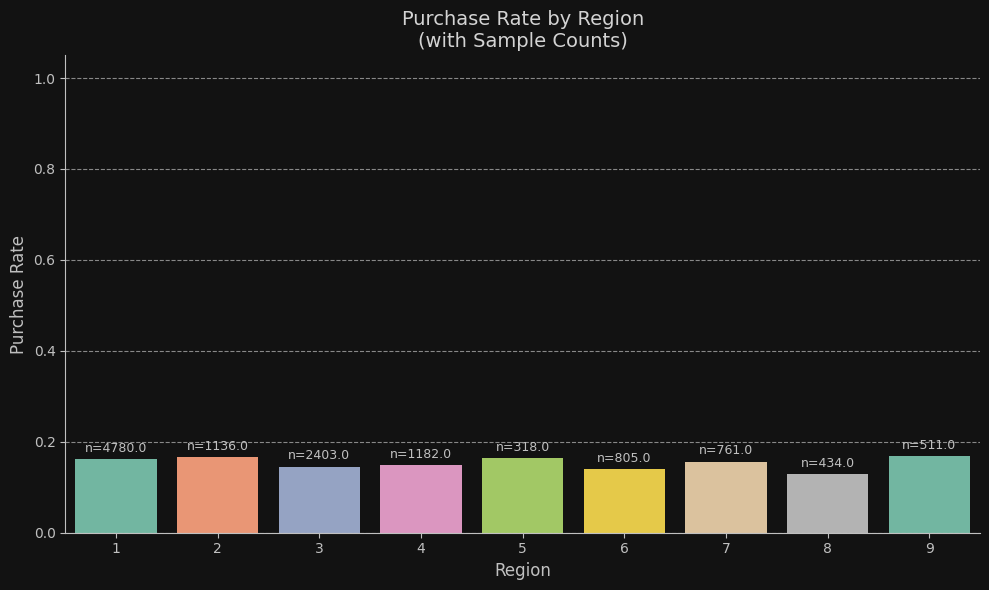

In [231]:
# Q17: Which Regions Have Higher Purchase Rates?
plt.figure(figsize=(10, 6))

# groupby region
region_summary = df.groupby('Region')['Revenue'].agg(['mean', 'count']).reset_index()

# mean purchase rate
sns.barplot(x='Region', y='mean', data=region_summary, ci=None, palette='Set2')

# label
for index, row in region_summary.iterrows():
    plt.text(index, row['mean'] + 0.01, f"n={row['count']}", ha='center', va='bottom', fontsize=9)


plt.title("Purchase Rate by Region\n(with Sample Counts)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Purchase Rate", fontsize=12)
plt.ylim(0, 1.05) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


sns.despine()

plt.tight_layout()
plt.show()

/Users/bryany/Library/Python/3.9/lib/python/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


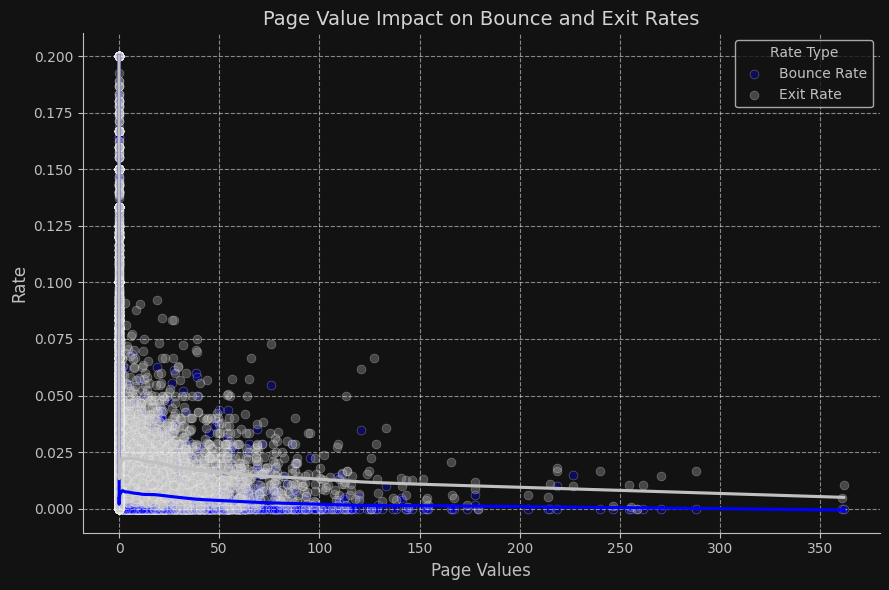

In [235]:
#Q18: How do Bounce and Exit Rates vary with Page Values?
plt.figure(figsize=(9, 6))

# Plot BounceRates
sns.scatterplot(x='PageValues', y='BounceRates', data=df, color='blue', s=40, alpha=0.3, label='Bounce Rate')

# Plot ExitRates
sns.scatterplot(x='PageValues', y='ExitRates', data=df, color='silver', s=40, alpha=0.3, label='Exit Rate')

#  Add regression lines (if appropriate)
sns.regplot(x='PageValues', y='BounceRates', data=df, scatter=False, color='blue', lowess=True)
sns.regplot(x='PageValues', y='ExitRates', data=df, scatter=False, color='silver', lowess=True)

plt.title("Page Value Impact on Bounce and Exit Rates", fontsize=14)
plt.xlabel("Page Values", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Rate Type", loc='upper right')
sns.despine()

plt.tight_layout()
plt.show()

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/3835444543.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


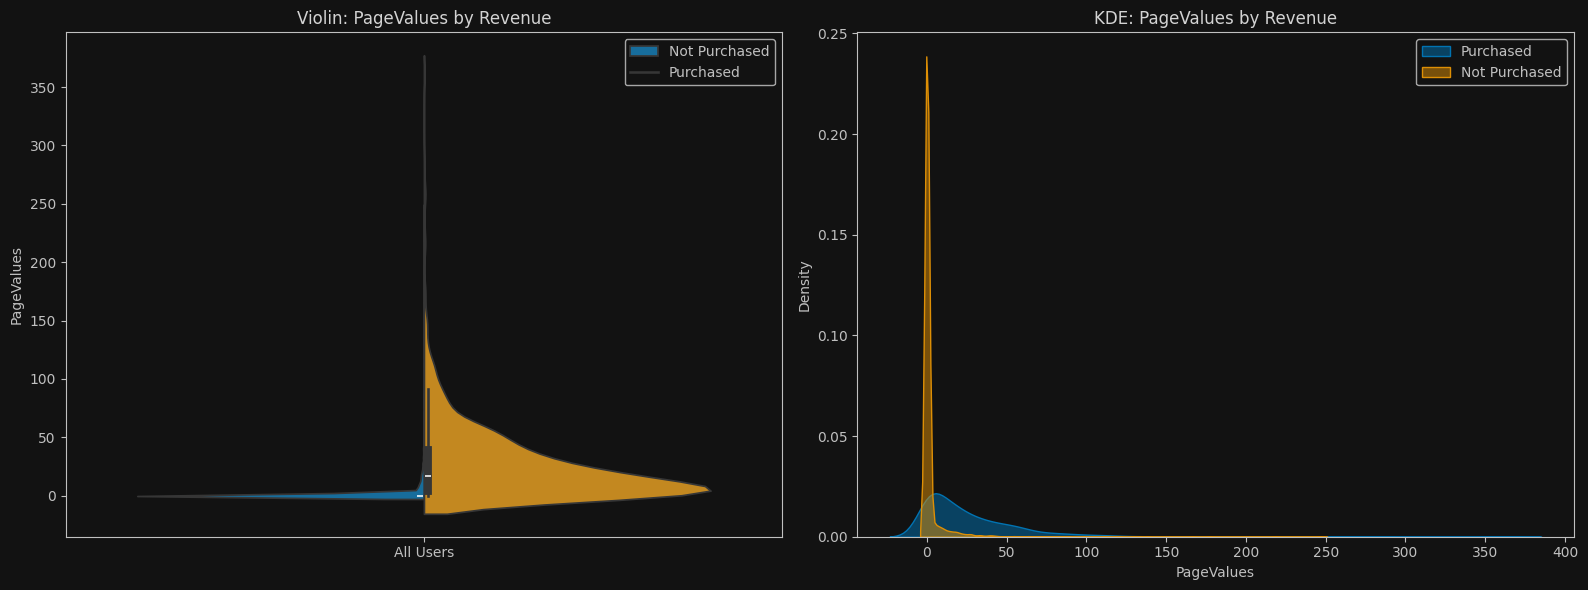

In [ ]:
#Q19: How do Page Values differ for Purchased vs Not Purchased sessions?

from matplotlib.patches import Patch

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df['Dummy'] = 'All Users'
cb_palette = sns.color_palette("colorblind", 2)

# Violin Plot
sns.violinplot(
    x='Dummy',
    y='PageValues',
    hue='Revenue',
    data=df,
    split=True,
    palette=cb_palette,
    scale='count',
    ax=axes[0]
)

plt.legend_.remove() if plt.gca().get_legend() else None


handles = [
    Patch(color=cb_palette[0], label='Not Purchased'),
    Patch(color=cb_palette[1], label='Purchased')
]

axes[0].set_title("Violin: PageValues by Revenue")
axes[0].set_xlabel("")
axes[0].set_ylabel("PageValues")
axes[0].legend(handles=handles,labels=["Not Purchased", "Purchased"])

# KDE Plot
sns.kdeplot(data=df[df['Revenue'] == 1], x='PageValues', fill=True, alpha=0.5, label='Purchased', color=cb_palette[0], ax=axes[1])
sns.kdeplot(data=df[df['Revenue'] == 0], x='PageValues', fill=True, alpha=0.5, label='Not Purchased', color=cb_palette[1], ax=axes[1])
axes[1].set_title("KDE: PageValues by Revenue")
axes[1].set_xlabel("PageValues")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()

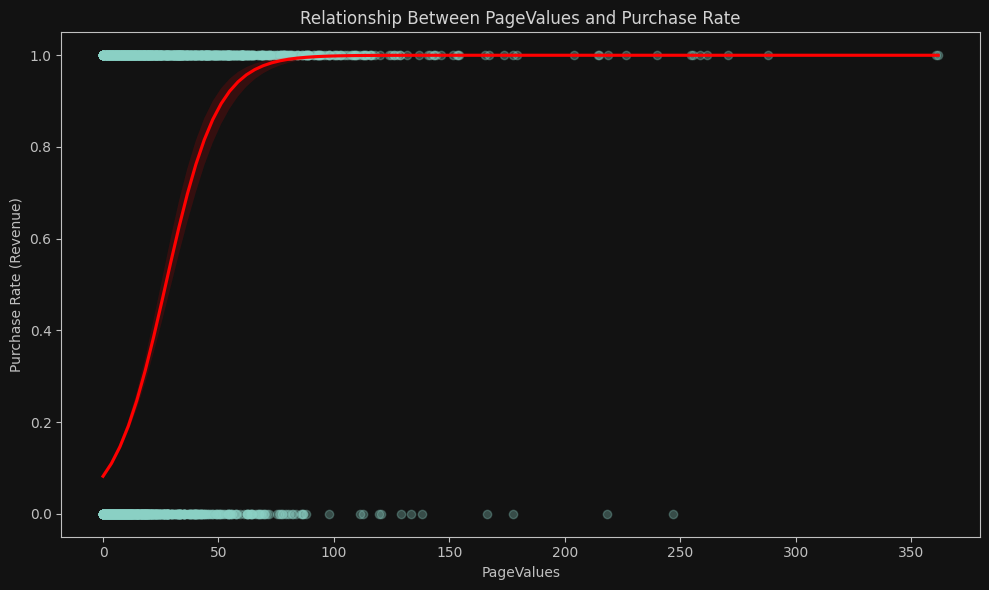

In [ ]:
#Q20: What's the trend of purcharse rate over PageValues?

plt.figure(figsize=(10, 6))
sns.regplot(x='PageValues', y='Revenue', data=df, logistic=True, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Relationship Between PageValues and Purchase Rate")
plt.xlabel("PageValues")
plt.ylabel("Purchase Rate (Revenue)")
plt.tight_layout()
plt.show()

/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/1914647844.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby('PageValues_Binned').agg({'Revenue': 'mean', 'PageValues': 'count'}).reset_index()
/var/folders/ql/1r50nmmx3qqcvkjp3p807ql00000gn/T/ipykernel_57230/1914647844.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PageValues_Binned', y='Revenue', data=binned_data, palette='Set2')


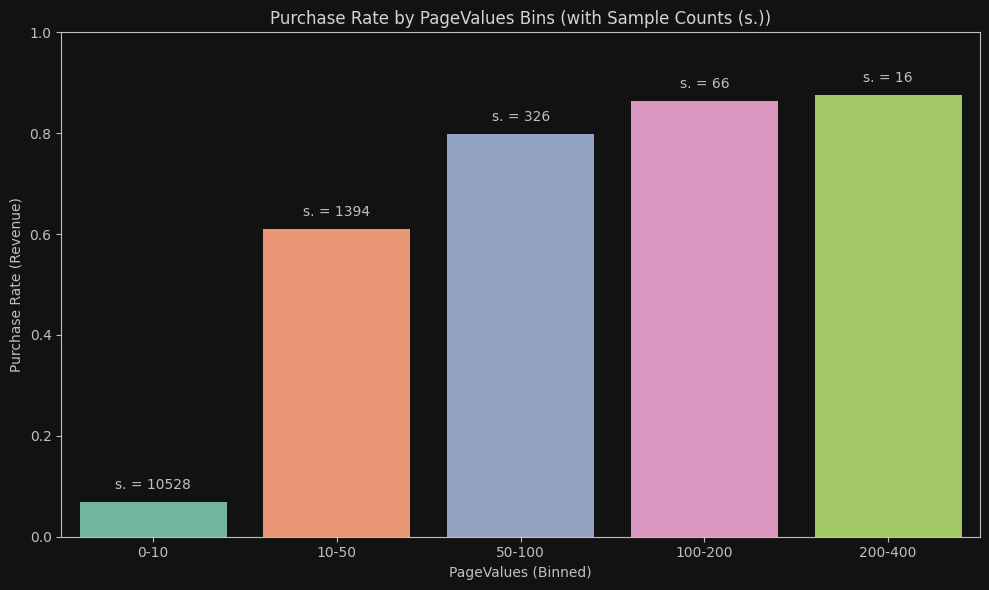

In [ ]:
# Q21: What is the Purchase Rate by PageValues Bins with Sample Counts?
bins = [0, 10, 50, 100, 200, 400]
labels = ['0-10', '10-50', '50-100', '100-200', '200-400']
df['PageValues_Binned'] = pd.cut(df['PageValues'], bins=bins, labels=labels, include_lowest=True)

binned_data = df.groupby('PageValues_Binned').agg({'Revenue': 'mean', 'PageValues': 'count'}).reset_index()
binned_data.rename(columns={'PageValues': 'Count'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(x='PageValues_Binned', y='Revenue', data=binned_data, palette='Set2')


for index, row in binned_data.iterrows():
    plt.text(index, row['Revenue'] + 0.02, f's. = {row["Count"]}', ha='center', va='bottom', fontsize=10)


plt.title("Purchase Rate by PageValues Bins (with Sample Counts (s.))")
plt.xlabel("PageValues (Binned)")
plt.ylabel("Purchase Rate (Revenue)")
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

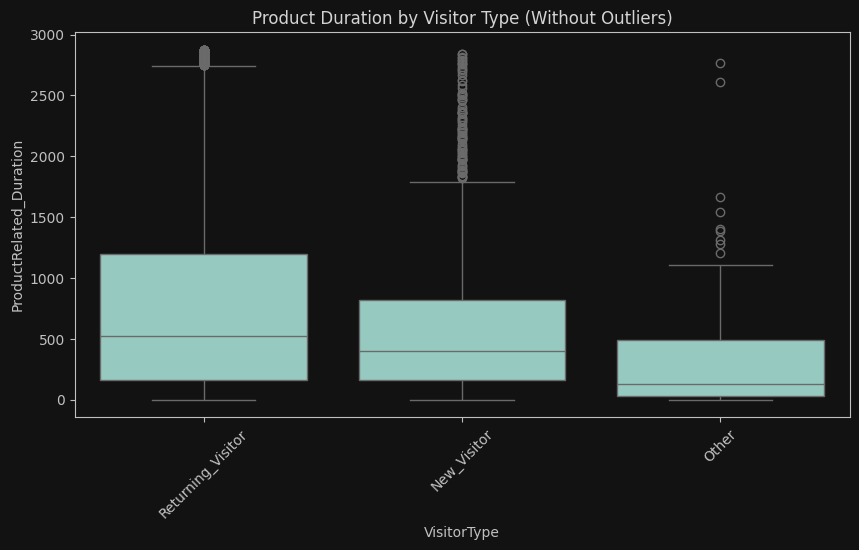

In [257]:
#Q22: How does Product-Related Duration vary across different Visitor Types?

filtered_df = df[df['ProductRelated_Duration'] <= df['ProductRelated_Duration'].quantile(0.9)]

plt.figure(figsize=(10, 5))
sns.boxplot(x='VisitorType', y='ProductRelated_Duration', data=filtered_df)
plt.title("Product Duration by Visitor Type (Without Outliers)")
plt.xticks(rotation=45)
plt.show()



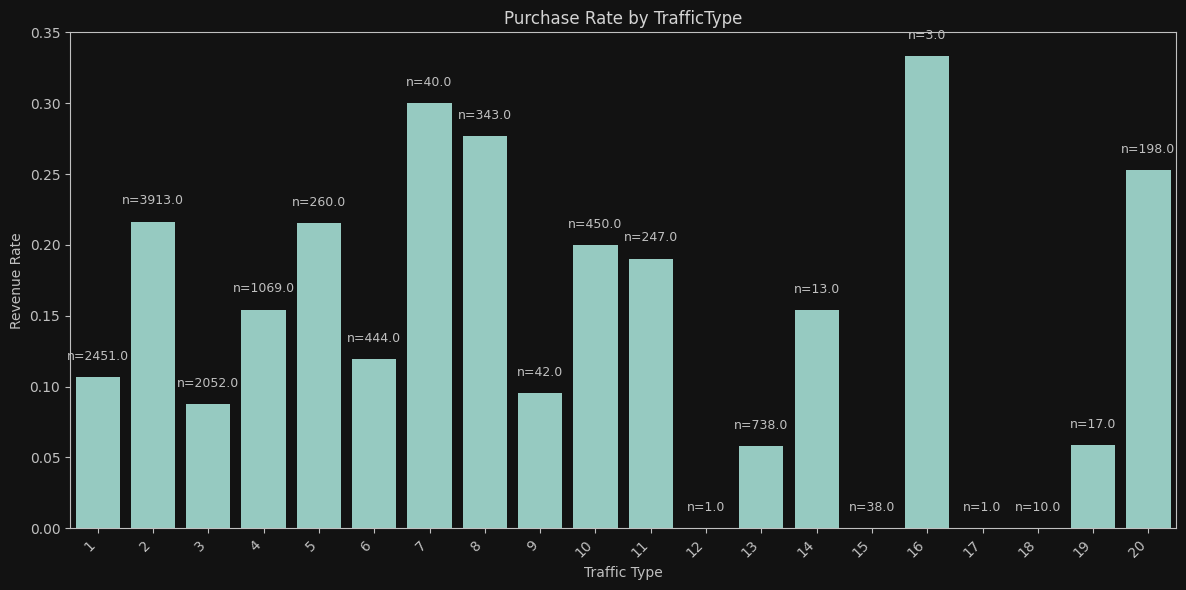

In [258]:
#Q23: How does traffic type affect purchase rate?

traffic_stats = df.groupby('TrafficType')['Revenue'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TrafficType', y='mean', data=traffic_stats)
plt.title("Purchase Rate by TrafficType")
plt.ylabel("Revenue Rate")
plt.xlabel("Traffic Type")

# Adjusting text placement and font size
for i, row in traffic_stats.iterrows():
    plt.text(i, row['mean'] + 0.01, f"n={row['count']}", ha='center', va='bottom', fontsize=9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

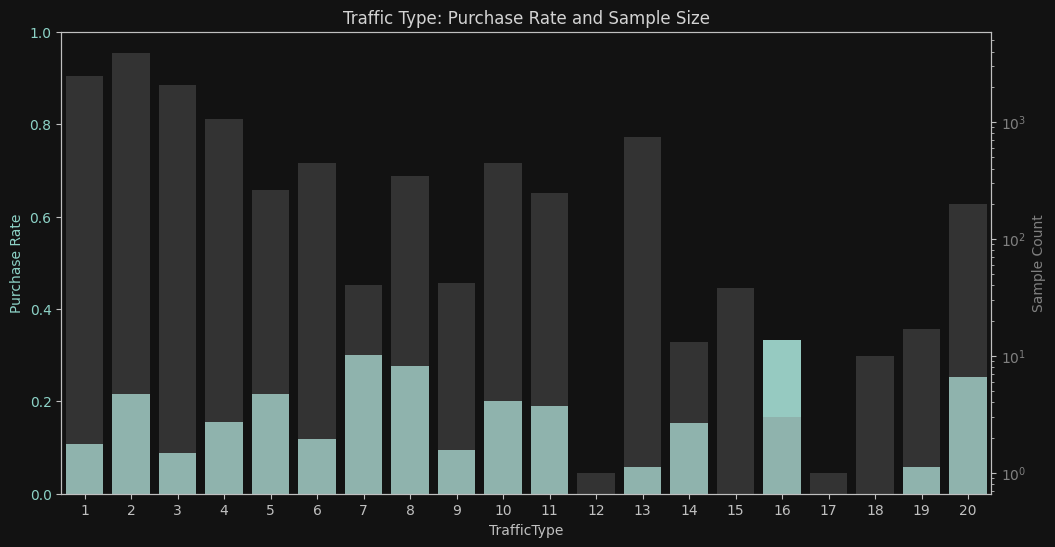

In [260]:
#Q24: What is the relationship between traffic type, purchase rate, and sample size?

temp = df.groupby('TrafficType')['Revenue'].agg(['mean', 'count']).reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))

# Revenue Rate
sns.barplot(x='TrafficType', y='mean', data=temp, ax=ax1, color='C0')
ax1.set_ylabel('Purchase Rate', color='C0')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_title("Traffic Type: Purchase Rate and Sample Size")

# Sample Counts
ax2 = ax1.twinx()
sns.barplot(x='TrafficType', y='count', data=temp, ax=ax2, alpha=0.3, color='gray')
ax2.set_ylabel('Sample Count', color='gray')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='gray')

plt.show()

In [102]:
df.groupby('SpecialDay')['Month'].unique()
df[df['SpecialDay'] > 0]['Month'].unique()

array(['Feb', 'May'], dtype=object)

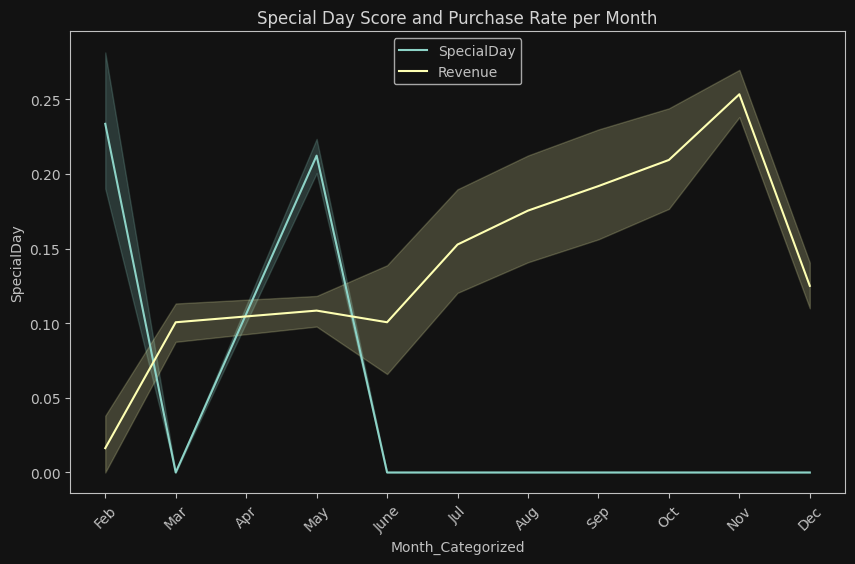

In [261]:
#Q25: What is the impact of Special Day on revenue across different months?

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_Categorized'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month_Categorized', y='SpecialDay', data=df, label='SpecialDay')
sns.lineplot(x='Month_Categorized', y='Revenue', data=df, label='Revenue')
plt.title("Special Day Score and Purchase Rate per Month")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [113]:
df['PageValues'].value_counts()
df['Cluster'].value_counts()

Cluster
0    10144
2     1976
1      210
Name: count, dtype: int64

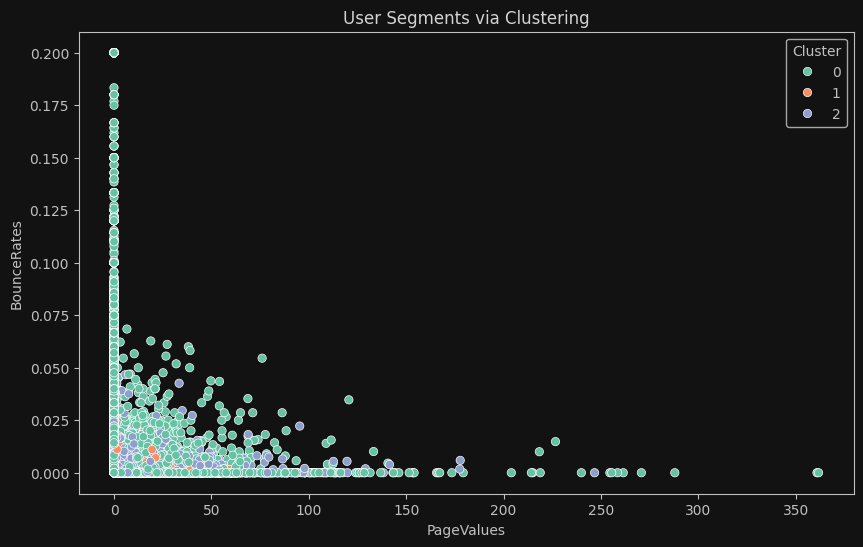

In [ ]:
# Q26: what's the cluster user behaviors look like by PageValues and BounceRates?

features = df[['BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PageValues', y='BounceRates', hue='Cluster', data=df, palette='Set2')
plt.title("User Segments via Clustering")
plt.show()

In [262]:
kmeans.cluster_centers_

array([[2.45360110e-02, 1.09322375e-01, 2.06017780e-02, 2.25924453e-02],
       [9.32174445e-01, 9.61169913e-01, 6.93889390e-18, 5.08414681e-04],
       [1.69942102e-01, 4.00663233e-01, 2.63647764e-03, 7.78623477e-03]])

In [111]:
df['Cluster'].value_counts()

Cluster
0    10144
2     1976
1      210
Name: count, dtype: int64

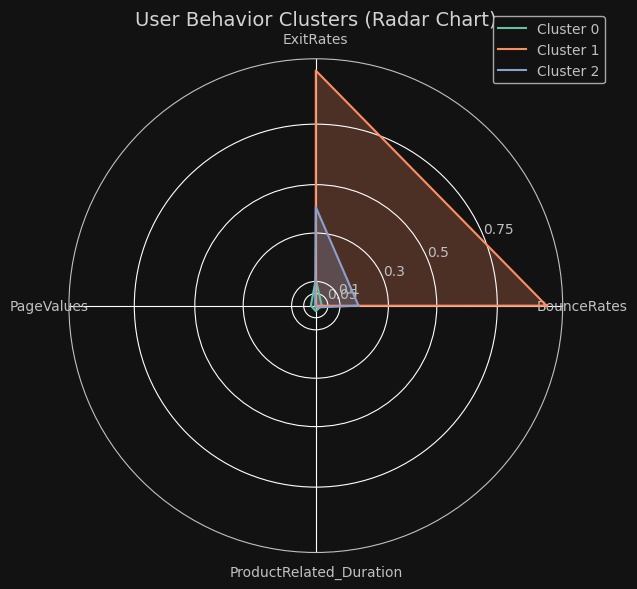

In [ ]:
#Q27: What's the cluster user behaviors look like by PageValues, ProductPages, ExitRates and BounceRates?
features = ['BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration']
df_features = df[features].copy()

from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=features)

# KMeans 
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# calculate cluster means
cluster_means = df.groupby('Cluster')[features].mean()
cluster_means_scaled = pd.DataFrame(scaler.transform(cluster_means), 
                                    columns=features, 
                                    index=cluster_means.index)

# radar
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 閉合

# 畫圖
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for i, row in cluster_means_scaled.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# plotting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.05, 0.1, 0.3, 0.5, 0.75])
ax.set_yticklabels(['0.05', '0.1', '0.3', '0.5', '0.75'])
ax.set_title('User Behavior Clusters (Radar Chart)', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

In [ ]:
#Q6: What's the clustering of users with respect to Administrative and Informational Pages?
features = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 绘制聚类散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Administrative', y='Informational', hue='Cluster', data=df, palette='Set2')
plt.title('User Segments via Clustering')
plt.show()